In [1]:
import pandas as pd
import numpy as np
import itertools


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [21]:
path = "/nfs/turbo/umms-indikar/shared/projects/poreC/pipeline_test/outputs/tables/filtered_alignment_table.csv"

df = pd.read_csv(path)
print(df.shape)
print(df['read_name'].nunique())

(422, 42)
119


In [22]:
f_min = df['fragment_start'].min()
f_max = df['fragment_end'].max()

In [23]:
path = "/nfs/turbo/umms-indikar/shared/projects/poreC/pipeline_test/outputs/tables/incidence_table.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()

(119, 5)


,read_name,cardinality,max_contact_distance,contact_midpoints,fragment_ids
0,6e3e2746-4ff1-436a-a6a1-2f7863500ada,9,283934,60449655;60446005;60445526;60330296;60614230;6...,11740893;11741744;11740906;11740863;11740867;1...
1,6514b854-2290-4ebf-ac98-cc419357d153,7,18399094,42090125;41715630;23691150;42090244;23692754;2...,11561167;11647850;11561157;11649591;11649590;1...
2,266c4de0-1e64-42b9-ba28-c446534576c7,7,35768364,42498181;6841792;42426216;42426697;42609650;42...,11481278;11651132;11481281;11651127;11652000;1...
3,4c46b32b-d4b0-4b92-91c1-b245d87aeb1b,6,27462260,41679038;41642631;14217422;41679305;41678571;4...,11647673;11647674;11647669;11515143;11647507;1...
4,d292fde0-3cfd-4924-834d-9be576c8b50b,6,523262,27635978;27636208;27637925;27549391;27114663;2...,11580658;11581086;11581084;11578405;11578406;1...


Text(0.5, 1.0, 'Hypergraph Representation of SC Pore-C')

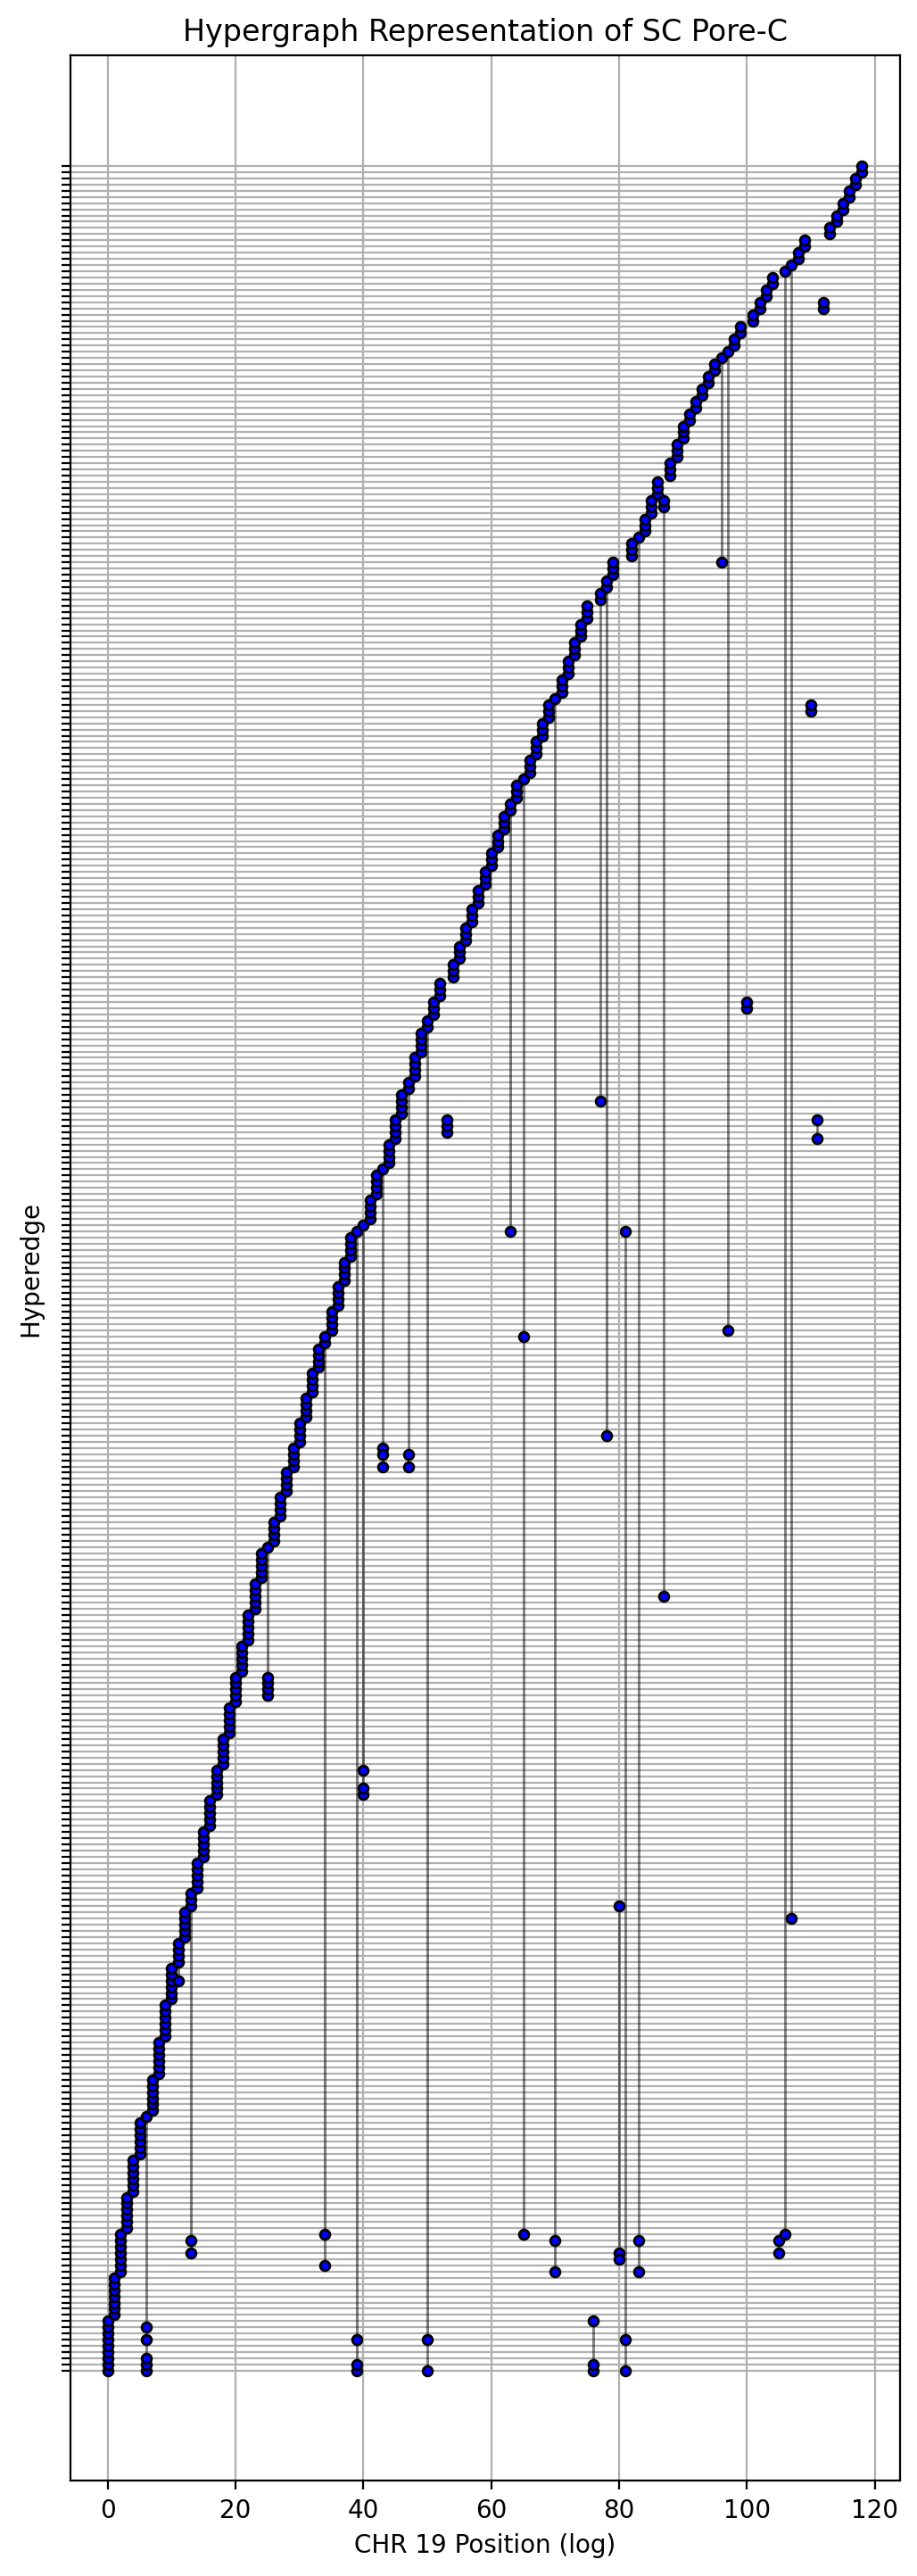

In [37]:
new_rows = []

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (6, 18)

for i, row in df.iterrows():
    contacts = [str(int(x)) for x in row['contact_midpoints'].split(";")]
    read = [i] * len(contacts)
    
    plt.plot(read, 
             contacts,
             c='k', 
             alpha=0.5,
             lw=1, 
             zorder=1)
    
    plt.scatter(read, 
                contacts, 
                s=15, 
                facecolor='b', 
                edgecolor='k',
                zorder=2)
    
plt.gca().set_axisbelow(True)
plt.grid(True)

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

plt.ylabel("Hyperedge")
plt.xlabel("CHR 19 Position (log)")
plt.title(f"Hypergraph Representation of SC Pore-C")        

In [79]:
# def get_all_midoints(df):
#     contact_list = [x.split(";") for x in df['contact_midpoints']]
#     contact_list = list(itertools.chain(*contact_list))
#     contact_list = sorted(list(set(contact_list)))
#     return contact_list
    
# contact_list = get_all_midoints(df)

In [80]:
# new_rows = []

# for contact in contact_list:
#     for idx, read in enumerate(df['read_name']):
#         row = {
#             'read' : read,
#             'contact'
#         }
        
# matplotlib.rcParams['figure.dpi'] = 200

# plt.scatter(x_values, y_values)
        